In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.losses import BinaryCrossentropy
from sklearn.metrics import confusion_matrix

##**1: Loading the Dataset**

In [60]:
df= pd.read_csv('./dataset.csv')

In [61]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [62]:
df.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

##**2: Preprocessing the Dataset**

In [63]:
df.dtypes


f1        object
f2        object
f3         int64
f4        object
f5        object
f6        object
f7        object
target     int64
dtype: object

As some of the features are of 'object' data type, first, we will convert them to numerical. Then we can check for nulls and treat them accordingly

In [64]:
df['f1'] = pd.to_numeric(df['f1'], errors = 'coerce')
df['f2'] = pd.to_numeric(df['f2'], errors = 'coerce')
df['f4'] = pd.to_numeric(df['f4'], errors = 'coerce')
df['f5'] = pd.to_numeric(df['f5'], errors = 'coerce')
df['f6'] = pd.to_numeric(df['f6'], errors = 'coerce')
df['f7'] = pd.to_numeric(df['f7'], errors = 'coerce')

In [65]:
df.dtypes

f1        float64
f2        float64
f3          int64
f4        float64
f5        float64
f6        float64
f7        float64
target      int64
dtype: object

In [66]:
df.isnull().sum()

f1        1
f2        1
f3        0
f4        1
f5        1
f6        1
f7        1
target    0
dtype: int64

In [67]:
df.dropna(inplace=True)

In [68]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


### Scaling the data and Splitting it into train - test sets

In [69]:
df.reset_index(drop = True)

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72,35.0,0.0,33.6,0.627,1
1,1.0,85.0,66,29.0,0.0,26.6,0.351,0
2,8.0,183.0,64,0.0,0.0,23.3,0.672,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,0
4,0.0,137.0,40,35.0,168.0,43.1,2.288,1
...,...,...,...,...,...,...,...,...
755,1.0,128.0,88,39.0,110.0,36.5,1.057,1
756,7.0,137.0,90,41.0,0.0,32.0,0.391,0
757,0.0,123.0,72,0.0,0.0,36.3,0.258,1
758,1.0,106.0,76,0.0,0.0,37.5,0.197,0


In [70]:
X = df.iloc[:,:-1]
y = df['target']

In [71]:
sca = StandardScaler()
X = sca.fit_transform(X)

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=22)

In [73]:
y_train= np.asarray(y_train).astype('float32').reshape((-1,1))
y_test= np.asarray(y_test).astype('float32').reshape((-1,1))

In [18]:
# sca = StandardScaler()
# X_train = sca.fit_transform(X_train)
# X_test = sca.transform(X_test)

##Building of Neural Network

In [19]:
model = Sequential()
model.add(Dense(8,input_dim=7,activation="relu")) #input layer
model.add(Dense(5,activation='relu')) #hidden layer 1

model.add(Dense(3,activation='relu')) #hidden layer 2
model.add(Dense(1,activation='sigmoid')) #output layer

##1. Setting up the training Loop

In [20]:

def train_loop(X,y,loss,optimizer,batch,num_of_epochs,model,val_split):
  num_of_batches=len(X)//batch

  trainLossValues = []
  valLossValues = []
  
  trainAccValues = []
  valAccValues = []


  #spliting the data for validation
  index_= int(len(X)*(1-val_split))
  X_t,y_t=X[:index_],y[:index_]
  X_validation,y_validation=X[index_:],y[index_:]
  for epoch in range(num_of_epochs):
    for b in range(num_of_batches):
      X_batch=X_t[(b*batch):((b+1)*batch)]
      y_batch=y_t[(b*batch):((b+1)*batch)]
      with tf.GradientTape() as grad_t:
        y_pred=model(X_batch)
        loss_val= loss(y_batch,y_pred)
      grads=grad_t.gradient(loss_val,model.trainable_variables)
      optimizer.apply_gradients(zip(grads,model.trainable_variables))
    train_loss = loss(y_t,model.predict(X_t))
    validation_loss=loss(y_validation,model.predict(X_validation))
    trainLossValues.append(train_loss)
    valLossValues.append(validation_loss)

    #Calculating accuracies
    y_pred_train = model.predict(X_t)
    y_pred_labels = (y_pred_train >= 0.5).astype(int)
    train_accuracy = accuracy_score(y_t, y_pred_labels)

    y_pred_val = model.predict(X_validation)
    y_pred_val_labels = (y_pred_val >= 0.5).astype(int)
    validation_accuracy = accuracy_score(y_validation, y_pred_val_labels)

    trainAccValues.append(train_accuracy)
    valAccValues.append(validation_accuracy)

    



    print(f'epoch: {epoch}, training loss: {train_loss}, validation loss: {validation_loss}, training accuracy: {train_accuracy}, validation accuracy: {validation_accuracy}')
  return trainLossValues, valLossValues, trainAccValues, valAccValues

##2 Define the loss function


In [21]:
loss= BinaryCrossentropy()

##3. Choose an optimizer and a learning rate

In [22]:
lr = 0.01
optimizer = SGD(learning_rate=lr)

## Training the neural network

In [23]:

num_epochs = 500
batch_size = 64

In [24]:
trainLossValues, valLossValues, trainAccValues, valAccValues = train_loop(X_train,y_train,loss,optimizer,batch_size,num_epochs,model,0.2)

5/5 [==============================] - 0s 3ms/step
epoch: 0, training loss: 0.7230091094970703, validation loss: 0.7342627644538879, training accuracy: 0.5320945945945946, validation accuracy: 0.4797297297297297
5/5 [==============================] - 0s 0s/step
epoch: 1, training loss: 0.7136987447738647, validation loss: 0.7244190573692322, training accuracy: 0.5591216216216216, validation accuracy: 0.49324324324324326
5/5 [==============================] - 0s 2ms/step
epoch: 2, training loss: 0.7054468989372253, validation loss: 0.7157278656959534, training accuracy: 0.5641891891891891, validation accuracy: 0.527027027027027
5/5 [==============================] - 0s 0s/step
epoch: 3, training loss: 0.6978896856307983, validation loss: 0.7076753973960876, training accuracy: 0.5827702702702703, validation accuracy: 0.5
5/5 [==============================] - 0s 0s/step
epoch: 4, training loss: 0.691349446773529, validation loss: 0.7006540894508362, training accuracy: 0.5878378378378378,

5/5 [==============================] - 0s 2ms/step
epoch: 44, training loss: 0.6215337514877319, validation loss: 0.6318084001541138, training accuracy: 0.6773648648648649, validation accuracy: 0.6486486486486487
5/5 [==============================] - 0s 2ms/step
epoch: 45, training loss: 0.6205933094024658, validation loss: 0.6311003565788269, training accuracy: 0.6824324324324325, validation accuracy: 0.6486486486486487
5/5 [==============================] - 0s 2ms/step
epoch: 46, training loss: 0.6196421980857849, validation loss: 0.6304104328155518, training accuracy: 0.6807432432432432, validation accuracy: 0.6486486486486487
5/5 [==============================] - 0s 1ms/step
epoch: 47, training loss: 0.618687629699707, validation loss: 0.6297186017036438, training accuracy: 0.6790540540540541, validation accuracy: 0.6621621621621622
5/5 [==============================] - 0s 1ms/step
epoch: 48, training loss: 0.6177329421043396, validation loss: 0.6290112137794495, training accura

5/5 [==============================] - 0s 1ms/step
epoch: 88, training loss: 0.5750301480293274, validation loss: 0.5934566855430603, training accuracy: 0.7297297297297297, validation accuracy: 0.7094594594594594
5/5 [==============================] - 0s 2ms/step
epoch: 89, training loss: 0.5739645957946777, validation loss: 0.592461347579956, training accuracy: 0.7280405405405406, validation accuracy: 0.722972972972973
5/5 [==============================] - 0s 1ms/step
epoch: 90, training loss: 0.5729070901870728, validation loss: 0.5914872884750366, training accuracy: 0.7280405405405406, validation accuracy: 0.7162162162162162
5/5 [==============================] - 0s 2ms/step
epoch: 91, training loss: 0.5718514919281006, validation loss: 0.5905025601387024, training accuracy: 0.7331081081081081, validation accuracy: 0.7162162162162162
5/5 [==============================] - 0s 3ms/step
epoch: 92, training loss: 0.5707964897155762, validation loss: 0.5895212888717651, training accurac

5/5 [==============================] - 0s 1ms/step
epoch: 110, training loss: 0.5526807904243469, validation loss: 0.5726699829101562, training accuracy: 0.7449324324324325, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 5ms/step
epoch: 111, training loss: 0.551714301109314, validation loss: 0.5718575119972229, training accuracy: 0.7466216216216216, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 3ms/step
epoch: 112, training loss: 0.5507681369781494, validation loss: 0.5710662007331848, training accuracy: 0.7449324324324325, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 1ms/step
epoch: 113, training loss: 0.5497783422470093, validation loss: 0.5702610611915588, training accuracy: 0.7466216216216216, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 3ms/step
epoch: 114, training loss: 0.5487836599349976, validation loss: 0.5694723129272461, training a

5/5 [==============================] - 0s 3ms/step
epoch: 133, training loss: 0.531343936920166, validation loss: 0.556266725063324, training accuracy: 0.7516891891891891, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 3ms/step
epoch: 134, training loss: 0.5305453538894653, validation loss: 0.5556860566139221, training accuracy: 0.7516891891891891, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 3ms/step
epoch: 135, training loss: 0.5297043323516846, validation loss: 0.5551004409790039, training accuracy: 0.7516891891891891, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 4ms/step
epoch: 136, training loss: 0.5288354754447937, validation loss: 0.5545105934143066, training accuracy: 0.7516891891891891, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 1ms/step
epoch: 137, training loss: 0.5279764533042908, validation loss: 0.553925096988678, training acc

5/5 [==============================] - 0s 2ms/step
epoch: 177, training loss: 0.5014225840568542, validation loss: 0.5400911569595337, training accuracy: 0.768581081081081, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 3ms/step
epoch: 178, training loss: 0.500976026058197, validation loss: 0.5398980379104614, training accuracy: 0.7702702702702703, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 2ms/step
epoch: 179, training loss: 0.5005322098731995, validation loss: 0.5397180318832397, training accuracy: 0.7702702702702703, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 3ms/step
epoch: 180, training loss: 0.5000983476638794, validation loss: 0.5395392775535583, training accuracy: 0.7702702702702703, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 3ms/step
epoch: 181, training loss: 0.49967750906944275, validation loss: 0.53937828540802, training acc

5/5 [==============================] - 0s 5ms/step
epoch: 221, training loss: 0.4867890775203705, validation loss: 0.5359819531440735, training accuracy: 0.7736486486486487, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 4ms/step
epoch: 222, training loss: 0.48657113313674927, validation loss: 0.5359869003295898, training accuracy: 0.7736486486486487, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 4ms/step
epoch: 223, training loss: 0.4863572120666504, validation loss: 0.5359970331192017, training accuracy: 0.7736486486486487, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 4ms/step
epoch: 224, training loss: 0.4861449599266052, validation loss: 0.5360018014907837, training accuracy: 0.7736486486486487, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 1ms/step
epoch: 225, training loss: 0.48593783378601074, validation loss: 0.536008894443512, training

5/5 [==============================] - 0s 5ms/step
epoch: 265, training loss: 0.4790150821208954, validation loss: 0.5367990732192993, training accuracy: 0.7804054054054054, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 2ms/step
epoch: 266, training loss: 0.4788859486579895, validation loss: 0.5368411540985107, training accuracy: 0.7804054054054054, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 4ms/step
epoch: 267, training loss: 0.478757381439209, validation loss: 0.5368735194206238, training accuracy: 0.7804054054054054, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 4ms/step
epoch: 268, training loss: 0.47862789034843445, validation loss: 0.5369076728820801, training accuracy: 0.7804054054054054, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 3ms/step
epoch: 269, training loss: 0.4785010814666748, validation loss: 0.5369412899017334, training 

5/5 [==============================] - 0s 5ms/step
epoch: 309, training loss: 0.47300100326538086, validation loss: 0.5378022789955139, training accuracy: 0.7820945945945946, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 2ms/step
epoch: 310, training loss: 0.4728538990020752, validation loss: 0.537837564945221, training accuracy: 0.7804054054054054, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 3ms/step
epoch: 311, training loss: 0.47271791100502014, validation loss: 0.5378575921058655, training accuracy: 0.7804054054054054, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 3ms/step
epoch: 312, training loss: 0.4725869297981262, validation loss: 0.5378894805908203, training accuracy: 0.7804054054054054, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 3ms/step
epoch: 313, training loss: 0.47245875000953674, validation loss: 0.5379253625869751, trainin

5/5 [==============================] - 0s 1ms/step
epoch: 353, training loss: 0.4675747752189636, validation loss: 0.53946852684021, training accuracy: 0.7837837837837838, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 2ms/step
epoch: 354, training loss: 0.4674684703350067, validation loss: 0.5395172238349915, training accuracy: 0.7837837837837838, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 2ms/step
epoch: 355, training loss: 0.4673652648925781, validation loss: 0.5395673513412476, training accuracy: 0.7837837837837838, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 5ms/step
epoch: 356, training loss: 0.46726056933403015, validation loss: 0.5396046042442322, training accuracy: 0.7837837837837838, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 2ms/step
epoch: 357, training loss: 0.46715617179870605, validation loss: 0.5396556258201599, training 

5/5 [==============================] - 0s 5ms/step
epoch: 397, training loss: 0.46333685517311096, validation loss: 0.5415427684783936, training accuracy: 0.785472972972973, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 0s/step
epoch: 398, training loss: 0.4632496237754822, validation loss: 0.5415834188461304, training accuracy: 0.785472972972973, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 2ms/step
epoch: 399, training loss: 0.4631626009941101, validation loss: 0.5416258573532104, training accuracy: 0.785472972972973, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 2ms/step
epoch: 400, training loss: 0.4630703330039978, validation loss: 0.5416695475578308, training accuracy: 0.785472972972973, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 2ms/step
epoch: 401, training loss: 0.4629843533039093, validation loss: 0.5417235493659973, training accu

5/5 [==============================] - 0s 3ms/step
epoch: 441, training loss: 0.45948800444602966, validation loss: 0.5441734194755554, training accuracy: 0.7888513513513513, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 3ms/step
epoch: 442, training loss: 0.4594031572341919, validation loss: 0.5442302227020264, training accuracy: 0.7888513513513513, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 4ms/step
epoch: 443, training loss: 0.45931732654571533, validation loss: 0.5442816615104675, training accuracy: 0.7888513513513513, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 4ms/step
epoch: 444, training loss: 0.4592323303222656, validation loss: 0.5443209409713745, training accuracy: 0.7888513513513513, validation accuracy: 0.7297297297297297
5/5 [==============================] - 0s 3ms/step
epoch: 445, training loss: 0.4591432511806488, validation loss: 0.5443785190582275, trainin

5/5 [==============================] - 0s 2ms/step
epoch: 485, training loss: 0.4556543529033661, validation loss: 0.5459158420562744, training accuracy: 0.7837837837837838, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 4ms/step
epoch: 486, training loss: 0.4555659890174866, validation loss: 0.5459396243095398, training accuracy: 0.7837837837837838, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 3ms/step
epoch: 487, training loss: 0.4554671347141266, validation loss: 0.5459521412849426, training accuracy: 0.7837837837837838, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 2ms/step
epoch: 488, training loss: 0.4553734064102173, validation loss: 0.5460066199302673, training accuracy: 0.7837837837837838, validation accuracy: 0.7364864864864865
5/5 [==============================] - 0s 3ms/step
epoch: 489, training loss: 0.4552803933620453, validation loss: 0.5460414886474609, training 

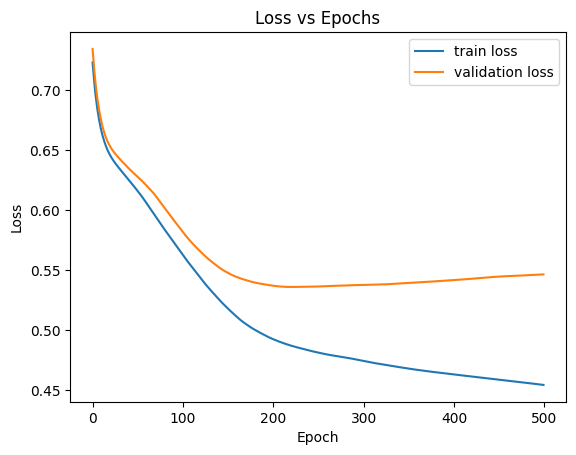

In [25]:
plt.plot(trainLossValues, label='train loss')
plt.plot(valLossValues, label='validation loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

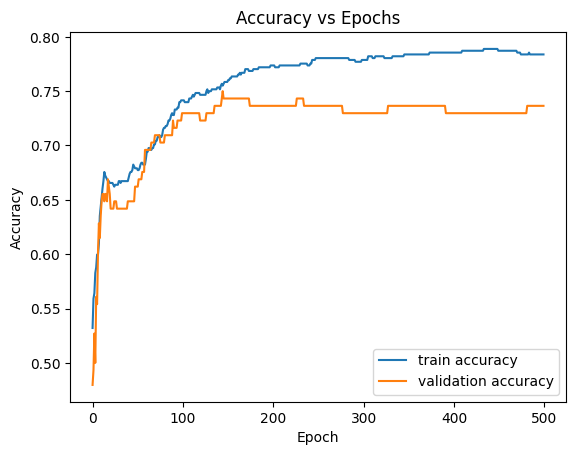

In [26]:
plt.plot(trainAccValues, label='train accuracy')
plt.plot(valAccValues, label='validation accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [27]:
# Evaluating model on test data
y_pred_test = model.predict(X_test)
y_pred_test_labels = (y_pred_test >= 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_test_labels)
test_accuracy

1/1 [==============================] - 0s 27ms/step


0.8

<h1>Deployment</h1>


##6. Save the weights of the trained neural network



In [141]:
model.save_weights('model_weights.h5')

In [78]:
file = open('nn_model.pkl', 'wb')
pickle.dump(model, file)